In [188]:
import pandas as pd

## 顧客データ
興味 1 ~ 5



In [189]:
user = pd.read_csv('./data/User.csv')
user

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking
0,U000001,M,44,3,5,2,1,1,1,5,3
1,U000002,F,36,3,5,1,1,1,1,5,3
2,U000003,F,29,4,5,1,3,1,2,2,1
3,U000004,M,37,2,1,3,3,3,1,1,5
4,U000005,F,37,3,5,1,1,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,F,30,1,1,3,3,3,5,1,1
3524,U003525,F,36,2,5,2,1,1,1,5,3
3525,U003526,F,47,2,1,3,3,3,1,1,5
3526,U003527,M,23,1,1,3,3,3,5,1,1


## 購入データ

In [190]:
# ６月に広告を導入している
def replace_month(m):
    if m == 'Jan':
        return '01'
    elif m == 'Feb':
        return '02'
    elif m == 'Mar':
        return '03'
    elif m == 'Apr':
        return '04'
    elif m == 'May':
        return '05'
    elif m == 'Jun':
        return '06'
    elif m == 'Jul':
        return '07'
    elif m == 'Aug':
        return '08'
    elif m == 'Sep':
        return '09'
    elif m == 'Oct':
        return '10'
    elif m == 'Nov':
        return '11'
    elif m == 'Dec':
        return '12'

tran = pd.read_csv('./data/Tran.csv')
tran['Month'] = tran['Month'].apply(lambda month: replace_month(month))
tran

,UserID,Month,Amount
0,U000001,11,21000
1,U000003,04,37000
2,U000003,10,2000
3,U000003,12,2000
4,U000004,02,2000
...,...,...,...
6536,U003526,06,2000
6537,U003527,02,1000
6538,U003527,06,89000
6539,U003527,07,105000


#### 月ごとの購入額を分析

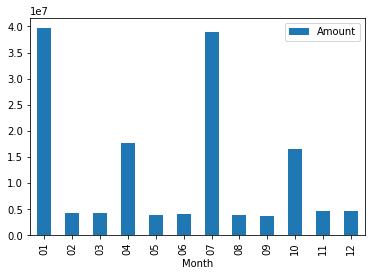

In [191]:
tran_month_sum = tran.groupby('Month').sum()
tran_month_sum.plot(y='Amount', kind='bar');

## 広告データ

In [192]:
AsMaster = pd.read_csv('./data/AdMaster_June.csv')
AsMaster

,UserID,isAd
0,U000001,0
1,U000003,0
2,U000004,0
3,U000005,0
4,U000006,0
...,...,...
3098,U003524,0
3099,U003525,0
3100,U003526,0
3101,U003527,0


In [193]:
## 広告やAmountに対して ""欠損値"" が含まれているので分析してみる
user_master = pd.merge(user, AsMaster, on='UserID', how='outer')
user_tran = pd.merge(user, tran.groupby('UserID').sum(), on='UserID', how='outer')

print('広告がNaNであるユーザ数：', user_master['isAd'].isnull().sum())
print('購入金額がNaNであるユーザ数：', user_tran['Amount'].isnull().sum())

広告がNaNであるユーザ数： 425
購入金額がNaNであるユーザ数： 425


---
広告がないユーザ　＝ 購入金額がないユーザ
これらは '無効なユーザ'　として処理することとする

---

## データのマージ

##### 広告がないユーザ 　→　無効なユーザ

In [194]:
user_tran = pd.merge(user, tran.groupby('UserID').sum(), on='UserID', how="inner")
df = pd.merge(user_tran, AsMaster, on='UserID', how='inner')

df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
0,U000001,M,44,3,5,2,1,1,1,5,3,21000,0
1,U000003,F,29,4,5,1,3,1,2,2,1,41000,0
2,U000004,M,37,2,1,3,3,3,1,1,5,3000,0
3,U000005,F,37,3,5,1,1,2,2,5,2,27000,0
4,U000006,F,29,1,1,3,3,3,5,1,1,103000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,U003524,F,30,1,1,3,3,3,5,1,1,209000,0
3099,U003525,F,36,2,5,2,1,1,1,5,3,66000,0
3100,U003526,F,47,2,1,3,3,3,1,1,5,2000,0
3101,U003527,M,23,1,1,3,3,3,5,1,1,195000,0


In [195]:
# データの確認作業

print("データ件数(広告あり)：", len(AsMaster)==len(df))
print("購入金額：", (tran.loc[:, 'Amount'].sum())==(df.loc[:, 'Amount'].sum()))
print("isAd合計値：", (AsMaster.loc[:, 'isAd'].sum())==(df.loc[:, 'isAd'].sum()))

データ件数(広告あり)： True
購入金額： True
isAd合計値： True


### データ全体に対しての統計値

In [196]:
df.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,35.054786,2.515952,2.987432,2.107960,2.554947,2.097970,2.129874,2.115694,2.549468,47036.738640,0.102159
std,7.244792,1.521283,1.847726,0.963357,0.861899,0.973242,1.621370,1.624429,1.530704,54789.703496,0.302906
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,0.000000
25%,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,0.000000
50%,35.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,25000.000000,0.000000
75%,40.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,74500.000000,0.000000
max,56.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,525000.000000,1.000000


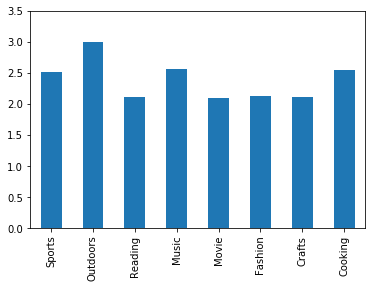

In [197]:
## 平均値
mean = df.describe().loc['mean']
mean.iloc[1:9].plot(kind='bar', ylim=[0, 3.5]);

* 特にOutSportが高い

In [198]:
## 広告に関して
df.describe().loc[:, 'isAd']

count    3103.000000
mean        0.102159
std         0.302906
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: isAd, dtype: float64

* 10％くらいに効果がある

### 広告で反応があったユーザについて分析を行う

In [199]:
Effective_ad = df[df['isAd'] == 1]
Effective_ad

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
16,U000021,M,30,1,1,3,3,4,4,1,2,2000,1
18,U000023,F,38,3,5,1,1,1,1,5,3,20000,1
20,U000025,F,43,2,5,1,1,1,1,4,3,27000,1
29,U000034,F,39,1,1,2,4,3,1,2,5,3000,1
32,U000037,F,21,5,5,1,3,1,1,1,1,83000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,U003464,M,44,3,5,1,1,1,1,5,3,21000,1
3057,U003478,M,39,5,5,1,3,1,2,1,2,42000,1
3059,U003480,M,24,1,1,2,3,3,5,2,1,3000,1
3067,U003490,M,33,2,1,3,3,3,1,1,5,21000,1


In [200]:
## データ全体に対しての統計値

Effective_ad.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0
mean,37.283912,2.649842,3.589905,1.757098,2.069401,1.769716,1.801262,3.110410,2.747634,39454.258675,1.0
std,6.965205,1.265577,1.734504,0.935070,1.000748,0.934889,1.394473,1.839386,1.267673,42851.841709,0.0
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.0
25%,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10000.000000,1.0
50%,39.000000,3.000000,5.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,24000.000000,1.0
75%,42.000000,3.000000,5.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,46000.000000,1.0
max,53.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,218000.000000,1.0


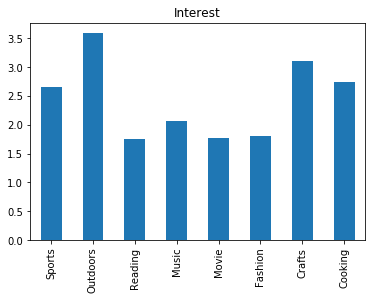

In [201]:
## 平均値
Effective_mean = Effective_ad.describe().loc['mean']
Effective_mean.iloc[1:9].plot(kind='bar', title='Interest');

#### 広告の効果があったユーザと全体的なユーザの興味の差

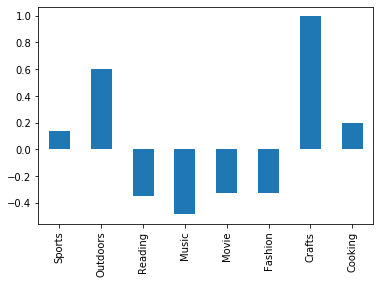

In [202]:
(Effective_mean.iloc[1:9] - mean.iloc[1:9]).plot(kind='bar');

### 広告の効果がなかったユーザについて分析を行う

In [203]:
UnEffective_ad = df[df['isAd'] == 0]
UnEffective_ad

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
0,U000001,M,44,3,5,2,1,1,1,5,3,21000,0
1,U000003,F,29,4,5,1,3,1,2,2,1,41000,0
2,U000004,M,37,2,1,3,3,3,1,1,5,3000,0
3,U000005,F,37,3,5,1,1,2,2,5,2,27000,0
4,U000006,F,29,1,1,3,3,3,5,1,1,103000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,U003524,F,30,1,1,3,3,3,5,1,1,209000,0
3099,U003525,F,36,2,5,2,1,1,1,5,3,66000,0
3100,U003526,F,47,2,1,3,3,3,1,1,5,2000,0
3101,U003527,M,23,1,1,3,3,3,5,1,1,195000,0


In [204]:
## データ全体に対しての統計値

UnEffective_ad.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.0
mean,34.801149,2.500718,2.918880,2.147882,2.610194,2.135319,2.167265,2.002513,2.526920,47899.497487,0.0
std,7.233719,1.547164,1.848059,0.958581,0.826984,0.970662,1.641260,1.558780,1.556417,55928.159418,0.0
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,0.0
25%,29.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,0.0
50%,35.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,25000.000000,0.0
75%,40.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,78000.000000,0.0
max,56.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,525000.000000,0.0


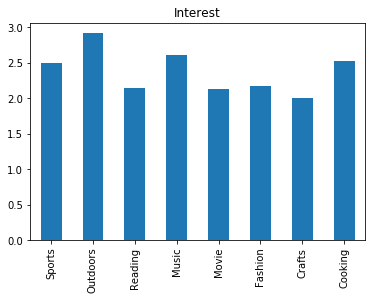

In [205]:
## 平均値
UnEffective_mean = UnEffective_ad.describe().loc['mean']
UnEffective_mean.iloc[1:9].plot(kind='bar', title='Interest');

#### 広告の効果があったユーザと広告の効果がなかったユーザの興味の差

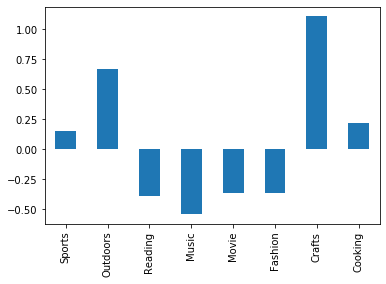

In [206]:
(Effective_mean.iloc[1:9] - UnEffective_mean.iloc[1:9]).plot(kind='bar');

#### 広告の効果がなかったユーザと全体的なユーザの興味の差

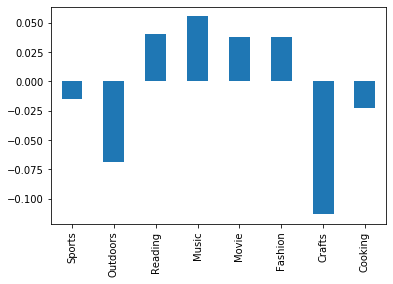

In [207]:
(UnEffective_mean.iloc[1:9] - mean.iloc[1:9]).plot(kind='bar');

上記結果から
広告の効果があるユーザは
* OutSportsへの関心・Craftsへの関心が高い
* Musicへの関心が低い

## 広告に効果があったユーザの購入額を分析する

In [208]:
## 広告に効果があったユーザを購入データから取り出す作業
Effective_ad = df[df['isAd'] == 1]
mask = tran["UserID"].apply(lambda userid: userid in Effective_ad["UserID"].values.tolist())

In [209]:
Effective_tran = tran[mask]
Effective_tran

,UserID,Month,Amount
37,U000021,11,2000
40,U000023,10,20000
44,U000025,02,3000
45,U000025,07,24000
61,U000034,04,3000
...,...,...,...
6474,U003490,01,2000
6475,U003490,02,10000
6476,U003490,11,9000
6482,U003495,04,34000


上記において
#### 広告はクリックしたが ６月以降に購入していないなら意味がないと判断する

---

### 広告をクリックし，かつ６月以降に購入したユーザ

In [210]:
from IPython.display import display

Effective_buy_after_ad_users = []

for u in Effective_ad["UserID"].values.tolist():
    display(Effective_tran[Effective_tran['UserID'] == u])
    ## 最終購入月が6月以降かどうか
    if 6 <= int(Effective_tran[Effective_tran['UserID'] == u]["Month"].iloc[-1]):
        Effective_buy_after_ad_users.append(u)
        print('EFFECTIVE')

,UserID,Month,Amount
37,U000021,11,2000


EFFECTIVE


,UserID,Month,Amount
40,U000023,10,20000


EFFECTIVE


,UserID,Month,Amount
44,U000025,02,3000
45,U000025,07,24000


EFFECTIVE


,UserID,Month,Amount
61,U000034,04,3000


,UserID,Month,Amount
65,U000037,04,43000
66,U000037,10,40000


EFFECTIVE


,UserID,Month,Amount
73,U000040,07,102000


EFFECTIVE


,UserID,Month,Amount
86,U000045,10,22000
87,U000045,11,1000


EFFECTIVE


,UserID,Month,Amount
136,U000070,02,10000
137,U000070,06,13000
138,U000070,11,10000


EFFECTIVE


,UserID,Month,Amount
153,U000076,05,2000
154,U000076,07,2000
155,U000076,09,2000


EFFECTIVE


,UserID,Month,Amount
172,U000086,04,42000
173,U000086,06,2000
174,U000086,10,2000


EFFECTIVE


,UserID,Month,Amount
175,U000087,11,3000


EFFECTIVE


,UserID,Month,Amount
211,U000108,01,2000
212,U000108,02,1000
213,U000108,08,2000
214,U000108,09,9000


EFFECTIVE


,UserID,Month,Amount
250,U000127,04,2000
251,U000127,12,3000


EFFECTIVE


,UserID,Month,Amount
261,U000134,06,20000
262,U000134,10,20000
263,U000134,11,1000
264,U000134,12,2000


EFFECTIVE


,UserID,Month,Amount
280,U000142,03,2000
281,U000142,11,20000


EFFECTIVE


,UserID,Month,Amount
313,U000163,11,1000


EFFECTIVE


,UserID,Month,Amount
317,U000166,03,17000


,UserID,Month,Amount
344,U000180,01,89000
345,U000180,05,2000
346,U000180,07,106000
347,U000180,08,2000
348,U000180,11,1000


EFFECTIVE


,UserID,Month,Amount
408,U000216,04,10000


,UserID,Month,Amount
449,U000236,03,22000
450,U000236,06,3000


EFFECTIVE


,UserID,Month,Amount
451,U000237,03,2000
452,U000237,06,20000
453,U000237,08,18000


EFFECTIVE


,UserID,Month,Amount
462,U000247,11,1000


EFFECTIVE


,UserID,Month,Amount
507,U000269,07,18000
508,U000269,11,18000


EFFECTIVE


,UserID,Month,Amount
534,U000285,08,17000
535,U000285,09,2000


EFFECTIVE


,UserID,Month,Amount
567,U000311,04,2000
568,U000311,10,3000
569,U000311,12,1000


EFFECTIVE


,UserID,Month,Amount
587,U000320,02,1000
588,U000320,10,2000


EFFECTIVE


,UserID,Month,Amount
592,U000322,04,19000
593,U000322,05,2000
594,U000322,11,17000


EFFECTIVE


,UserID,Month,Amount
634,U000346,06,2000
635,U000346,07,2000
636,U000346,10,22000


EFFECTIVE


,UserID,Month,Amount
649,U000355,02,2000
650,U000355,08,2000
651,U000355,12,36000


EFFECTIVE


,UserID,Month,Amount
658,U000360,04,41000
659,U000360,10,36000


EFFECTIVE


,UserID,Month,Amount
660,U000361,08,10000
661,U000361,10,8000
662,U000361,12,10000


EFFECTIVE


,UserID,Month,Amount
663,U000362,07,104000


EFFECTIVE


,UserID,Month,Amount
669,U000366,06,2000
670,U000366,09,2000


EFFECTIVE


,UserID,Month,Amount
684,U000374,04,2000
685,U000374,05,2000
686,U000374,07,98000


EFFECTIVE


,UserID,Month,Amount
698,U000381,07,2000
699,U000381,10,2000


EFFECTIVE


,UserID,Month,Amount
700,U000383,03,1000
701,U000383,11,1000


EFFECTIVE


,UserID,Month,Amount
702,U000384,02,2000
703,U000384,03,3000
704,U000384,05,2000
705,U000384,11,3000


EFFECTIVE


,UserID,Month,Amount
755,U000406,04,37000
756,U000406,09,2000
757,U000406,10,42000


EFFECTIVE


,UserID,Month,Amount
861,U000461,05,2000
862,U000461,06,20000
863,U000461,10,2000


EFFECTIVE


,UserID,Month,Amount
884,U000470,01,91000
885,U000470,06,2000


EFFECTIVE


,UserID,Month,Amount
891,U000475,06,2000


EFFECTIVE


,UserID,Month,Amount
910,U000490,04,23000
911,U000490,06,2000


EFFECTIVE


,UserID,Month,Amount
962,U000517,04,3000
963,U000517,11,2000


EFFECTIVE


,UserID,Month,Amount
973,U000523,05,20000
974,U000523,08,21000
975,U000523,10,1000


EFFECTIVE


,UserID,Month,Amount
991,U000533,03,17000
992,U000533,12,2000


EFFECTIVE


,UserID,Month,Amount
1008,U000541,01,2000
1009,U000541,04,43000


,UserID,Month,Amount
1010,U000542,05,2000
1011,U000542,12,19000


EFFECTIVE


,UserID,Month,Amount
1012,U000543,04,2000
1013,U000543,07,89000


EFFECTIVE


,UserID,Month,Amount
1064,U000576,02,9000
1065,U000576,12,8000


EFFECTIVE


,UserID,Month,Amount
1070,U000579,05,18000
1071,U000579,07,21000
1072,U000579,08,20000


EFFECTIVE


,UserID,Month,Amount
1106,U000599,04,26000
1107,U000599,07,2000
1108,U000599,09,21000


EFFECTIVE


,UserID,Month,Amount
1136,U000613,12,22000


EFFECTIVE


,UserID,Month,Amount
1152,U000623,11,2000


EFFECTIVE


,UserID,Month,Amount
1167,U000634,01,19000
1168,U000634,10,25000


EFFECTIVE


,UserID,Month,Amount
1179,U000640,01,2000
1180,U000640,03,2000
1181,U000640,04,40000


,UserID,Month,Amount
1191,U000646,04,18000
1192,U000646,07,20000
1193,U000646,09,2000
1194,U000646,12,2000


EFFECTIVE


,UserID,Month,Amount
1210,U000654,03,46000
1211,U000654,04,44000


,UserID,Month,Amount
1245,U000672,02,20000
1246,U000672,06,1000


EFFECTIVE


,UserID,Month,Amount
1280,U000694,04,2000
1281,U000694,12,13000


EFFECTIVE


,UserID,Month,Amount
1284,U000696,04,11000
1285,U000696,05,9000
1286,U000696,06,2000


EFFECTIVE


,UserID,Month,Amount
1287,U000697,05,23000
1288,U000697,08,1000


EFFECTIVE


,UserID,Month,Amount
1289,U000698,07,19000
1290,U000698,08,17000


EFFECTIVE


,UserID,Month,Amount
1303,U000704,01,1000
1304,U000704,02,22000
1305,U000704,08,2000
1306,U000704,09,23000


EFFECTIVE


,UserID,Month,Amount
1312,U000709,08,18000


EFFECTIVE


,UserID,Month,Amount
1313,U000710,02,2000
1314,U000710,07,2000
1315,U000710,11,1000


EFFECTIVE


,UserID,Month,Amount
1348,U000726,11,9000


EFFECTIVE


,UserID,Month,Amount
1349,U000727,02,1000


,UserID,Month,Amount
1378,U000744,01,88000


,UserID,Month,Amount
1380,U000746,01,101000
1381,U000746,11,2000


EFFECTIVE


,UserID,Month,Amount
1410,U000760,01,2000
1411,U000760,03,2000
1412,U000760,11,25000


EFFECTIVE


,UserID,Month,Amount
1421,U000766,04,21000
1422,U000766,09,19000
1423,U000766,12,3000


EFFECTIVE


,UserID,Month,Amount
1426,U000770,01,22000
1427,U000770,03,22000


,UserID,Month,Amount
1458,U000789,06,1000
1459,U000789,12,3000


EFFECTIVE


,UserID,Month,Amount
1482,U000801,06,3000


EFFECTIVE


,UserID,Month,Amount
1503,U000813,01,99000
1504,U000813,07,111000
1505,U000813,10,3000
1506,U000813,12,2000


EFFECTIVE


,UserID,Month,Amount
1525,U000823,04,47000
1526,U000823,08,2000
1527,U000823,09,2000


EFFECTIVE


,UserID,Month,Amount
1538,U000829,11,3000
1539,U000829,12,1000


EFFECTIVE


,UserID,Month,Amount
1563,U000841,11,2000
1564,U000841,12,42000


EFFECTIVE


,UserID,Month,Amount
1602,U000864,05,2000


,UserID,Month,Amount
1621,U000875,01,97000
1622,U000875,05,89000


,UserID,Month,Amount
1623,U000878,06,2000
1624,U000878,07,22000
1625,U000878,09,3000


EFFECTIVE


,UserID,Month,Amount
1650,U000890,04,2000
1651,U000890,07,87000


EFFECTIVE


,UserID,Month,Amount
1666,U000900,01,2000


,UserID,Month,Amount
1671,U000902,03,1000
1672,U000902,07,2000
1673,U000902,11,18000


EFFECTIVE


,UserID,Month,Amount
1694,U000911,01,2000


,UserID,Month,Amount
1709,U000919,11,2000


EFFECTIVE


,UserID,Month,Amount
1772,U000949,01,11000
1773,U000949,06,2000


EFFECTIVE


,UserID,Month,Amount
1799,U000963,07,2000


EFFECTIVE


,UserID,Month,Amount
1813,U000974,05,20000


,UserID,Month,Amount
1817,U000976,01,97000


,UserID,Month,Amount
1846,U000992,08,22000


EFFECTIVE


,UserID,Month,Amount
1847,U000993,03,22000
1848,U000993,09,20000
1849,U000993,12,1000


EFFECTIVE


,UserID,Month,Amount
1853,U000995,01,2000
1854,U000995,04,39000


,UserID,Month,Amount
1855,U000996,01,23000
1856,U000996,05,17000
1857,U000996,07,21000
1858,U000996,09,1000
1859,U000996,10,19000


EFFECTIVE


,UserID,Month,Amount
1862,U000999,02,19000
1863,U000999,10,2000
1864,U000999,11,21000


EFFECTIVE


,UserID,Month,Amount
1876,U001005,07,1000


EFFECTIVE


,UserID,Month,Amount
1880,U001008,05,3000
1881,U001008,11,2000


EFFECTIVE


,UserID,Month,Amount
1895,U001014,03,2000
1896,U001014,04,2000
1897,U001014,11,18000


EFFECTIVE


,UserID,Month,Amount
1908,U001022,09,22000


EFFECTIVE


,UserID,Month,Amount
1913,U001025,11,2000


EFFECTIVE


,UserID,Month,Amount
1915,U001027,01,20000
1916,U001027,08,21000


EFFECTIVE


,UserID,Month,Amount
1917,U001028,11,21000


EFFECTIVE


,UserID,Month,Amount
1931,U001036,02,17000


,UserID,Month,Amount
1955,U001049,10,47000
1956,U001049,11,2000


EFFECTIVE


,UserID,Month,Amount
1958,U001052,03,21000
1959,U001052,06,1000
1960,U001052,10,18000


EFFECTIVE


,UserID,Month,Amount
1982,U001062,05,2000


,UserID,Month,Amount
1994,U001070,05,18000
1995,U001070,07,23000
1996,U001070,09,18000
1997,U001070,11,28000


EFFECTIVE


,UserID,Month,Amount
2100,U001144,04,2000
2101,U001144,05,3000
2102,U001144,06,11000
2103,U001144,12,10000


EFFECTIVE


,UserID,Month,Amount
2156,U001170,08,20000
2157,U001170,12,18000


EFFECTIVE


,UserID,Month,Amount
2199,U001193,02,2000
2200,U001193,04,40000
2201,U001193,10,45000
2202,U001193,11,3000


EFFECTIVE


,UserID,Month,Amount
2203,U001194,10,21000


EFFECTIVE


,UserID,Month,Amount
2228,U001208,06,2000
2229,U001208,07,2000
2230,U001208,08,2000


EFFECTIVE


,UserID,Month,Amount
2237,U001212,01,18000
2238,U001212,04,3000
2239,U001212,05,1000


,UserID,Month,Amount
2272,U001227,02,1000
2273,U001227,10,2000


EFFECTIVE


,UserID,Month,Amount
2285,U001236,08,2000


EFFECTIVE


,UserID,Month,Amount
2307,U001245,06,20000
2308,U001245,07,20000
2309,U001245,09,2000
2310,U001245,12,22000


EFFECTIVE


,UserID,Month,Amount
2314,U001248,01,102000
2315,U001248,07,109000
2316,U001248,09,2000


EFFECTIVE


,UserID,Month,Amount
2327,U001254,03,10000
2328,U001254,07,11000
2329,U001254,09,7000


EFFECTIVE


,UserID,Month,Amount
2380,U001285,01,19000
2381,U001285,03,3000
2382,U001285,07,22000
2383,U001285,12,23000


EFFECTIVE


,UserID,Month,Amount
2401,U001292,01,97000
2402,U001292,10,2000
2403,U001292,12,2000


EFFECTIVE


,UserID,Month,Amount
2426,U001302,01,95000
2427,U001302,07,106000


EFFECTIVE


,UserID,Month,Amount
2474,U001330,08,2000
2475,U001330,11,20000


EFFECTIVE


,UserID,Month,Amount
2518,U001351,07,2000
2519,U001351,10,36000


EFFECTIVE


,UserID,Month,Amount
2547,U001365,09,23000
2548,U001365,11,22000


EFFECTIVE


,UserID,Month,Amount
2551,U001367,10,24000
2552,U001367,11,20000


EFFECTIVE


,UserID,Month,Amount
2553,U001368,10,3000


EFFECTIVE


,UserID,Month,Amount
2565,U001375,01,104000
2566,U001375,03,2000
2567,U001375,07,2000
2568,U001375,09,2000
2569,U001375,11,2000


EFFECTIVE


,UserID,Month,Amount
2586,U001386,10,20000
2587,U001386,12,2000


EFFECTIVE


,UserID,Month,Amount
2597,U001391,08,21000


EFFECTIVE


,UserID,Month,Amount
2598,U001392,04,33000
2599,U001392,08,2000


EFFECTIVE


,UserID,Month,Amount
2667,U001429,06,1000
2668,U001429,07,2000


EFFECTIVE


,UserID,Month,Amount
2669,U001430,01,10000
2670,U001430,07,9000
2671,U001430,11,2000


EFFECTIVE


,UserID,Month,Amount
2694,U001444,01,85000
2695,U001444,07,2000


EFFECTIVE


,UserID,Month,Amount
2718,U001460,09,2000


EFFECTIVE


,UserID,Month,Amount
2721,U001462,07,19000
2722,U001462,11,20000


EFFECTIVE


,UserID,Month,Amount
2743,U001471,05,1000
2744,U001471,08,8000


EFFECTIVE


,UserID,Month,Amount
2761,U001480,09,21000


EFFECTIVE


,UserID,Month,Amount
2792,U001497,12,22000


EFFECTIVE


,UserID,Month,Amount
2800,U001502,03,17000
2801,U001502,08,1000
2802,U001502,09,18000


EFFECTIVE


,UserID,Month,Amount
2822,U001515,07,19000
2823,U001515,08,2000


EFFECTIVE


,UserID,Month,Amount
2824,U001516,11,2000


EFFECTIVE


,UserID,Month,Amount
2826,U001521,01,3000


,UserID,Month,Amount
2843,U001530,07,112000


EFFECTIVE


,UserID,Month,Amount
2867,U001545,07,2000
2868,U001545,10,2000


EFFECTIVE


,UserID,Month,Amount
2885,U001554,07,90000


EFFECTIVE


,UserID,Month,Amount
2906,U001564,05,94000
2907,U001564,12,1000


EFFECTIVE


,UserID,Month,Amount
2917,U001570,04,40000
2918,U001570,10,47000


EFFECTIVE


,UserID,Month,Amount
2926,U001574,03,2000
2927,U001574,04,2000
2928,U001574,11,11000
2929,U001574,12,9000


EFFECTIVE


,UserID,Month,Amount
2930,U001575,12,2000


EFFECTIVE


,UserID,Month,Amount
2940,U001580,03,10000
2941,U001580,07,2000


EFFECTIVE


,UserID,Month,Amount
2973,U001602,01,102000
2974,U001602,07,2000
2975,U001602,12,2000


EFFECTIVE


,UserID,Month,Amount
2988,U001609,04,1000
2989,U001609,10,3000
2990,U001609,11,21000


EFFECTIVE


,UserID,Month,Amount
2997,U001613,03,3000
2998,U001613,10,106000


EFFECTIVE


,UserID,Month,Amount
3002,U001615,04,2000
3003,U001615,07,21000
3004,U001615,08,2000
3005,U001615,11,18000


EFFECTIVE


,UserID,Month,Amount
3006,U001617,05,16000
3007,U001617,12,2000


EFFECTIVE


,UserID,Month,Amount
3012,U001620,12,20000


EFFECTIVE


,UserID,Month,Amount
3104,U001672,03,3000
3105,U001672,08,2000
3106,U001672,11,2000


EFFECTIVE


,UserID,Month,Amount
3130,U001688,06,17000


EFFECTIVE


,UserID,Month,Amount
3144,U001698,02,2000
3145,U001698,05,2000
3146,U001698,10,53000


EFFECTIVE


,UserID,Month,Amount
3151,U001703,06,86000
3152,U001703,07,94000


EFFECTIVE


,UserID,Month,Amount
3159,U001707,09,21000
3160,U001707,10,2000


EFFECTIVE


,UserID,Month,Amount
3177,U001716,02,2000


,UserID,Month,Amount
3184,U001719,02,11000
3185,U001719,04,2000
3186,U001719,06,2000


EFFECTIVE


,UserID,Month,Amount
3284,U001781,02,2000


,UserID,Month,Amount
3331,U001808,04,2000


,UserID,Month,Amount
3337,U001811,01,102000
3338,U001811,09,2000


EFFECTIVE


,UserID,Month,Amount
3372,U001830,02,2000
3373,U001830,07,2000
3374,U001830,08,2000


EFFECTIVE


,UserID,Month,Amount
3435,U001864,01,97000
3436,U001864,06,3000


EFFECTIVE


,UserID,Month,Amount
3448,U001873,03,2000
3449,U001873,04,43000
3450,U001873,10,46000


EFFECTIVE


,UserID,Month,Amount
3472,U001884,05,2000
3473,U001884,06,3000


EFFECTIVE


,UserID,Month,Amount
3477,U001888,01,91000
3478,U001888,07,115000


EFFECTIVE


,UserID,Month,Amount
3496,U001899,05,19000
3497,U001899,09,21000


EFFECTIVE


,UserID,Month,Amount
3570,U001946,03,20000
3571,U001946,04,3000
3572,U001946,06,3000


EFFECTIVE


,UserID,Month,Amount
3585,U001953,01,117000
3586,U001953,04,2000
3587,U001953,07,93000


EFFECTIVE


,UserID,Month,Amount
3599,U001959,01,22000
3600,U001959,07,2000


EFFECTIVE


,UserID,Month,Amount
3648,U001984,06,8000
3649,U001984,08,10000
3650,U001984,12,8000


EFFECTIVE


,UserID,Month,Amount
3680,U002002,06,1000
3681,U002002,09,2000
3682,U002002,10,2000


EFFECTIVE


,UserID,Month,Amount
3735,U002032,02,19000
3736,U002032,05,18000
3737,U002032,07,22000
3738,U002032,11,3000


EFFECTIVE


,UserID,Month,Amount
3768,U002050,10,43000


EFFECTIVE


,UserID,Month,Amount
3795,U002062,02,20000
3796,U002062,12,23000


EFFECTIVE


,UserID,Month,Amount
3812,U002070,01,3000
3813,U002070,07,107000


EFFECTIVE


,UserID,Month,Amount
3836,U002084,03,17000
3837,U002084,05,2000


,UserID,Month,Amount
3867,U002097,01,11000
3868,U002097,03,2000
3869,U002097,06,10000


EFFECTIVE


,UserID,Month,Amount
3874,U002100,04,36000


,UserID,Month,Amount
3878,U002103,04,39000


,UserID,Month,Amount
3879,U002104,04,2000
3880,U002104,07,3000


EFFECTIVE


,UserID,Month,Amount
3888,U002110,04,35000
3889,U002110,09,1000
3890,U002110,10,42000


EFFECTIVE


,UserID,Month,Amount
3905,U002117,03,9000
3906,U002117,05,10000
3907,U002117,12,10000


EFFECTIVE


,UserID,Month,Amount
3931,U002133,01,9000


,UserID,Month,Amount
3932,U002134,01,2000
3933,U002134,02,2000
3934,U002134,04,20000
3935,U002134,08,24000


EFFECTIVE


,UserID,Month,Amount
3963,U002147,05,23000
3964,U002147,10,19000
3965,U002147,11,23000


EFFECTIVE


,UserID,Month,Amount
3974,U002156,04,3000
3975,U002156,12,23000


EFFECTIVE


,UserID,Month,Amount
3990,U002164,09,18000


EFFECTIVE


,UserID,Month,Amount
4007,U002174,04,21000
4008,U002174,05,2000


,UserID,Month,Amount
4038,U002188,03,19000
4039,U002188,10,21000


EFFECTIVE


,UserID,Month,Amount
4068,U002207,09,2000


EFFECTIVE


,UserID,Month,Amount
4074,U002210,04,2000
4075,U002210,07,96000
4076,U002210,10,2000


EFFECTIVE


,UserID,Month,Amount
4079,U002213,03,3000
4080,U002213,04,2000


,UserID,Month,Amount
4089,U002218,07,2000
4090,U002218,09,2000


EFFECTIVE


,UserID,Month,Amount
4115,U002233,08,2000
4116,U002233,09,2000
4117,U002233,10,2000
4118,U002233,12,20000


EFFECTIVE


,UserID,Month,Amount
4134,U002245,03,10000
4135,U002245,04,3000
4136,U002245,09,2000


EFFECTIVE


,UserID,Month,Amount
4154,U002258,07,2000


EFFECTIVE


,UserID,Month,Amount
4174,U002269,04,17000
4175,U002269,08,2000
4176,U002269,10,19000
4177,U002269,12,19000


EFFECTIVE


,UserID,Month,Amount
4184,U002276,10,2000
4185,U002276,11,21000
4186,U002276,12,19000


EFFECTIVE


,UserID,Month,Amount
4187,U002277,01,34000
4188,U002277,04,37000
4189,U002277,08,1000


EFFECTIVE


,UserID,Month,Amount
4190,U002279,01,2000
4191,U002279,07,18000
4192,U002279,08,22000
4193,U002279,12,20000


EFFECTIVE


,UserID,Month,Amount
4200,U002283,01,23000
4201,U002283,06,2000
4202,U002283,07,2000
4203,U002283,10,23000
4204,U002283,12,1000


EFFECTIVE


,UserID,Month,Amount
4214,U002287,10,18000


EFFECTIVE


,UserID,Month,Amount
4312,U002335,06,22000
4313,U002335,11,2000


EFFECTIVE


,UserID,Month,Amount
4347,U002352,04,2000
4348,U002352,08,22000


EFFECTIVE


,UserID,Month,Amount
4352,U002356,11,21000


EFFECTIVE


,UserID,Month,Amount
4358,U002360,05,2000
4359,U002360,10,38000


EFFECTIVE


,UserID,Month,Amount
4361,U002362,04,2000
4362,U002362,07,2000
4363,U002362,09,22000


EFFECTIVE


,UserID,Month,Amount
4395,U002382,08,21000


EFFECTIVE


,UserID,Month,Amount
4421,U002394,01,19000
4422,U002394,02,3000
4423,U002394,07,16000


EFFECTIVE


,UserID,Month,Amount
4436,U002402,09,2000


EFFECTIVE


,UserID,Month,Amount
4439,U002404,01,85000
4440,U002404,07,99000


EFFECTIVE


,UserID,Month,Amount
4441,U002405,06,2000
4442,U002405,10,21000
4443,U002405,11,2000


EFFECTIVE


,UserID,Month,Amount
4449,U002409,03,2000
4450,U002409,06,20000
4451,U002409,07,20000
4452,U002409,08,20000
4453,U002409,09,18000
4454,U002409,10,2000


EFFECTIVE


,UserID,Month,Amount
4456,U002413,08,16000
4457,U002413,11,2000


EFFECTIVE


,UserID,Month,Amount
4472,U002422,04,35000


,UserID,Month,Amount
4505,U002443,01,2000


,UserID,Month,Amount
4534,U002456,02,11000
4535,U002456,09,2000


EFFECTIVE


,UserID,Month,Amount
4572,U002473,02,2000
4573,U002473,07,20000


EFFECTIVE


,UserID,Month,Amount
4575,U002475,01,41000


,UserID,Month,Amount
4594,U002486,09,102000


EFFECTIVE


,UserID,Month,Amount
4595,U002487,02,20000
4596,U002487,08,20000
4597,U002487,09,1000
4598,U002487,11,3000


EFFECTIVE


,UserID,Month,Amount
4619,U002498,12,2000


EFFECTIVE


,UserID,Month,Amount
4640,U002510,02,19000
4641,U002510,07,19000
4642,U002510,09,24000


EFFECTIVE


,UserID,Month,Amount
4651,U002516,02,10000
4652,U002516,05,13000
4653,U002516,08,2000
4654,U002516,09,10000


EFFECTIVE


,UserID,Month,Amount
4674,U002527,07,105000


EFFECTIVE


,UserID,Month,Amount
4682,U002532,02,2000
4683,U002532,04,46000
4684,U002532,08,40000
4685,U002532,09,2000


EFFECTIVE


,UserID,Month,Amount
4707,U002550,04,22000
4708,U002550,05,3000
4709,U002550,11,2000
4710,U002550,12,22000


EFFECTIVE


,UserID,Month,Amount
4727,U002557,04,40000
4728,U002557,05,3000
4729,U002557,10,44000


EFFECTIVE


,UserID,Month,Amount
4743,U002564,07,2000
4744,U002564,09,23000


EFFECTIVE


,UserID,Month,Amount
4748,U002568,05,16000
4749,U002568,12,18000


EFFECTIVE


,UserID,Month,Amount
4772,U002579,02,2000
4773,U002579,06,1000


EFFECTIVE


,UserID,Month,Amount
4797,U002591,04,17000


,UserID,Month,Amount
4818,U002600,05,2000


,UserID,Month,Amount
4840,U002613,01,100000
4841,U002613,11,2000


EFFECTIVE


,UserID,Month,Amount
4852,U002621,08,2000


EFFECTIVE


,UserID,Month,Amount
4856,U002624,01,22000


,UserID,Month,Amount
4880,U002637,07,19000
4881,U002637,09,2000


EFFECTIVE


,UserID,Month,Amount
4894,U002644,01,20000
4895,U002644,12,23000


EFFECTIVE


,UserID,Month,Amount
4896,U002645,03,1000
4897,U002645,05,9000


,UserID,Month,Amount
4906,U002649,07,101000


EFFECTIVE


,UserID,Month,Amount
4940,U002667,01,10000


,UserID,Month,Amount
5062,U002725,07,3000
5063,U002725,11,20000


EFFECTIVE


,UserID,Month,Amount
5075,U002732,01,107000
5076,U002732,06,2000
5077,U002732,07,109000


EFFECTIVE


,UserID,Month,Amount
5093,U002743,08,24000
5094,U002743,11,2000


EFFECTIVE


,UserID,Month,Amount
5099,U002747,01,1000
5100,U002747,02,2000
5101,U002747,07,22000


EFFECTIVE


,UserID,Month,Amount
5102,U002748,11,2000


EFFECTIVE


,UserID,Month,Amount
5124,U002764,01,9000


,UserID,Month,Amount
5177,U002796,01,102000
5178,U002796,10,2000


EFFECTIVE


,UserID,Month,Amount
5181,U002798,04,50000
5182,U002798,06,2000


EFFECTIVE


,UserID,Month,Amount
5187,U002801,05,2000
5188,U002801,08,3000
5189,U002801,10,11000
5190,U002801,11,10000


EFFECTIVE


,UserID,Month,Amount
5206,U002812,01,2000
5207,U002812,05,19000
5208,U002812,10,22000


EFFECTIVE


,UserID,Month,Amount
5209,U002813,03,2000
5210,U002813,06,20000
5211,U002813,07,21000
5212,U002813,11,1000


EFFECTIVE


,UserID,Month,Amount
5254,U002838,01,19000
5255,U002838,06,20000
5256,U002838,07,2000
5257,U002838,08,2000


EFFECTIVE


,UserID,Month,Amount
5324,U002878,10,2000


EFFECTIVE


,UserID,Month,Amount
5325,U002879,03,19000
5326,U002879,05,1000
5327,U002879,11,21000


EFFECTIVE


,UserID,Month,Amount
5361,U002903,10,21000
5362,U002903,11,2000


EFFECTIVE


,UserID,Month,Amount
5363,U002904,08,18000


EFFECTIVE


,UserID,Month,Amount
5364,U002905,02,3000
5365,U002905,11,20000


EFFECTIVE


,UserID,Month,Amount
5385,U002915,06,10000


EFFECTIVE


,UserID,Month,Amount
5426,U002935,02,2000
5427,U002935,05,22000
5428,U002935,08,17000
5429,U002935,10,24000
5430,U002935,12,22000


EFFECTIVE


,UserID,Month,Amount
5461,U002955,02,2000
5462,U002955,03,2000
5463,U002955,06,18000


EFFECTIVE


,UserID,Month,Amount
5468,U002958,01,99000
5469,U002958,07,2000
5470,U002958,09,1000


EFFECTIVE


,UserID,Month,Amount
5500,U002975,10,2000


EFFECTIVE


,UserID,Month,Amount
5503,U002977,01,3000
5504,U002977,02,22000
5505,U002977,07,2000


EFFECTIVE


,UserID,Month,Amount
5556,U002999,02,2000


,UserID,Month,Amount
5634,U003040,04,40000
5635,U003040,10,41000


EFFECTIVE


,UserID,Month,Amount
5641,U003043,03,3000
5642,U003043,10,31000


EFFECTIVE


,UserID,Month,Amount
5657,U003051,05,2000
5658,U003051,06,26000


EFFECTIVE


,UserID,Month,Amount
5698,U003078,02,19000
5699,U003078,10,2000
5700,U003078,11,22000
5701,U003078,12,18000


EFFECTIVE


,UserID,Month,Amount
5715,U003086,01,87000
5716,U003086,12,2000


EFFECTIVE


,UserID,Month,Amount
5742,U003100,01,40000
5743,U003100,07,2000
5744,U003100,08,1000
5745,U003100,09,3000


EFFECTIVE


,UserID,Month,Amount
5755,U003108,06,2000


EFFECTIVE


,UserID,Month,Amount
5757,U003110,01,2000
5758,U003110,02,2000
5759,U003110,07,18000


EFFECTIVE


,UserID,Month,Amount
5772,U003117,11,18000


EFFECTIVE


,UserID,Month,Amount
5785,U003125,04,19000
5786,U003125,08,2000
5787,U003125,09,18000


EFFECTIVE


,UserID,Month,Amount
5788,U003126,09,17000
5789,U003126,12,2000


EFFECTIVE


,UserID,Month,Amount
5807,U003134,10,2000


EFFECTIVE


,UserID,Month,Amount
5820,U003144,05,1000


,UserID,Month,Amount
5821,U003145,05,10000


,UserID,Month,Amount
5835,U003154,01,11000
5836,U003154,07,10000
5837,U003154,08,9000
5838,U003154,10,3000
5839,U003154,11,1000


EFFECTIVE


,UserID,Month,Amount
5840,U003155,01,2000
5841,U003155,10,18000


EFFECTIVE


,UserID,Month,Amount
5853,U003160,07,21000


EFFECTIVE


,UserID,Month,Amount
5859,U003163,01,83000
5860,U003163,05,2000


,UserID,Month,Amount
5883,U003174,07,93000


EFFECTIVE


,UserID,Month,Amount
5901,U003183,01,21000


,UserID,Month,Amount
5904,U003185,09,2000
5905,U003185,12,2000


EFFECTIVE


,UserID,Month,Amount
5911,U003191,07,2000


EFFECTIVE


,UserID,Month,Amount
5936,U003207,10,3000


EFFECTIVE


,UserID,Month,Amount
5937,U003208,09,3000


EFFECTIVE


,UserID,Month,Amount
5956,U003220,01,80000
5957,U003220,04,2000
5958,U003220,07,93000
5959,U003220,09,2000


EFFECTIVE


,UserID,Month,Amount
5978,U003230,05,2000
5979,U003230,07,2000
5980,U003230,10,3000


EFFECTIVE


,UserID,Month,Amount
5983,U003233,07,2000
5984,U003233,08,9000


EFFECTIVE


,UserID,Month,Amount
6019,U003254,05,3000
6020,U003254,07,16000
6021,U003254,09,22000
6022,U003254,10,19000
6023,U003254,12,2000


EFFECTIVE


,UserID,Month,Amount
6025,U003256,07,102000
6026,U003256,11,1000


EFFECTIVE


,UserID,Month,Amount
6052,U003271,05,2000
6053,U003271,06,1000
6054,U003271,11,11000


EFFECTIVE


,UserID,Month,Amount
6099,U003294,02,1000


,UserID,Month,Amount
6126,U003309,08,2000


EFFECTIVE


,UserID,Month,Amount
6129,U003311,12,24000


EFFECTIVE


,UserID,Month,Amount
6162,U003328,03,17000
6163,U003328,06,18000
6164,U003328,11,19000
6165,U003328,12,2000


EFFECTIVE


,UserID,Month,Amount
6196,U003344,05,1000
6197,U003344,07,97000


EFFECTIVE


,UserID,Month,Amount
6198,U003345,02,20000
6199,U003345,07,1000
6200,U003345,10,18000


EFFECTIVE


,UserID,Month,Amount
6320,U003410,01,9000
6321,U003410,12,10000


EFFECTIVE


,UserID,Month,Amount
6339,U003422,03,2000


,UserID,Month,Amount
6343,U003425,09,19000


EFFECTIVE


,UserID,Month,Amount
6369,U003438,08,2000
6370,U003438,10,2000


EFFECTIVE


,UserID,Month,Amount
6395,U003450,03,18000
6396,U003450,04,2000


,UserID,Month,Amount
6419,U003464,05,19000
6420,U003464,11,2000


EFFECTIVE


,UserID,Month,Amount
6447,U003478,02,1000
6448,U003478,05,2000
6449,U003478,10,37000
6450,U003478,12,2000


EFFECTIVE


,UserID,Month,Amount
6453,U003480,03,3000


,UserID,Month,Amount
6474,U003490,01,2000
6475,U003490,02,10000
6476,U003490,11,9000


EFFECTIVE


,UserID,Month,Amount
6482,U003495,04,34000
6483,U003495,05,1000


In [211]:
print(f'{len(Effective_buy_after_ad_users)}人')

269人


In [212]:
mask = df['UserID'].apply(lambda userid: userid in Effective_buy_after_ad_users)
Effective_buy_after_ad = df[mask]
Effective_buy_after_ad

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
16,U000021,M,30,1,1,3,3,4,4,1,2,2000,1
18,U000023,F,38,3,5,1,1,1,1,5,3,20000,1
20,U000025,F,43,2,5,1,1,1,1,4,3,27000,1
32,U000037,F,21,5,5,1,3,1,1,1,1,83000,1
35,U000040,M,34,2,2,3,4,3,5,1,2,102000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,U003425,F,50,3,5,1,2,2,1,5,3,19000,1
3020,U003438,F,31,5,5,1,3,1,1,1,1,4000,1
3044,U003464,M,44,3,5,1,1,1,1,5,3,21000,1
3057,U003478,M,39,5,5,1,3,1,2,1,2,42000,1


In [213]:
Effective_buy_after_ad.describe()

,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0
mean,37.531599,2.609665,3.594796,1.743494,2.007435,1.762082,1.817844,3.219331,2.788104,42029.739777,1.0
std,6.948365,1.215593,1.715636,0.948882,0.992481,0.939937,1.409025,1.842755,1.220047,43721.633110,0.0
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.0
25%,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,15000.000000,1.0
50%,39.000000,3.000000,5.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,26000.000000,1.0
75%,42.000000,3.000000,5.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,51000.000000,1.0
max,53.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,218000.000000,1.0


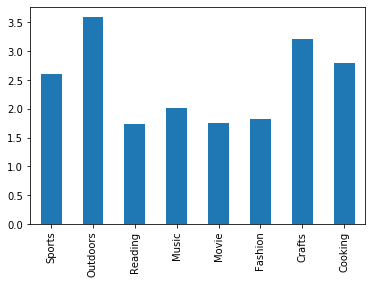

In [214]:
## 平均値
Effective_buy_after_ad_mean = Effective_buy_after_ad.describe().loc['mean']
Effective_buy_after_ad_mean.iloc[1:9].plot(kind='bar');

#### 広告後に実際に購入したユーザと全体的なユーザの興味の差

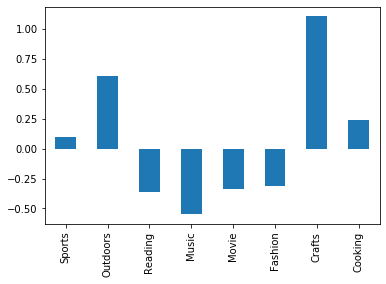

In [215]:
(Effective_buy_after_ad_mean.iloc[1:9] - mean.iloc[1:9]).plot(kind='bar');

---

## 結果
* 無効ユーザは約425人
* 前回は3103件の広告を配信し，約10%(317)の人が広告をクリックした
* 実際にクリック後（６月以降）に購入したユーザは 269人で約8.7%
<br>

* ユーザ全体としてOutsportsに興味があり，ReadingやCraftsに興味がない
* ユーザ全体の平均年齢は 35歳

<br>

* 広告に効果があったユーザは 特に **Outsports**や**Crafts**に，全体よりも興味があり，ReadingやMusicに興味がない
* 広告に効果があったユーザは　平均37歳

---

### 実際に数値的に基準を考えてみる

In [216]:
like_outdoors = df["Outdoors"] >= 3
like_crafts = df["Crafts"] >= 3
dont_like_music = df["Music"] <= 2
# old = df["Age"] >= 37
target_user = df[like_outdoors & like_crafts & dont_like_music]

target_user

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,isAd
0,U000001,M,44,3,5,2,1,1,1,5,3,21000,0
3,U000005,F,37,3,5,1,1,2,2,5,2,27000,0
7,U000011,F,44,3,5,1,1,1,1,4,3,34000,0
9,U000013,F,42,3,5,1,1,1,2,5,2,21000,0
11,U000015,F,28,3,5,1,2,2,2,4,3,18000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,U003509,M,45,3,5,1,1,2,1,4,3,2000,0
3086,U003510,M,39,2,5,2,1,1,2,5,3,40000,0
3089,U003514,M,41,3,5,1,1,1,1,4,3,43000,0
3096,U003522,F,46,2,5,1,1,1,2,5,3,2000,0


In [217]:
cnt = 0
target = target_user["UserID"].values.tolist()
for u in Effective_buy_after_ad_users:
    if u in target:
        cnt += 1
        
print(f'抽出したユーザに #広告をクリックして購入を行ったユーザは {cnt/len(target):.1%} 含まれる')
print(cnt, "人")
print(f'今回購入したユーザの {cnt/len(Effective_buy_after_ad_users):.1%} が含まれる')

print("="*10)

cnt = 0
Effective_ad_users = Effective_ad["UserID"].values.tolist()
for u in Effective_ad_users:
    if u in target:
        cnt += 1
        
print(f'抽出したユーザに #広告をクリックしたユーザは {cnt/len(target):.1%} 含まれる')
print(cnt, "人")
print(f'今回購入したユーザの {cnt/len(Effective_ad_users):.1%} が含まれる')


target_user["isAd"].sum()/target_user["isAd"].count()

抽出したユーザに #広告をクリックして購入を行ったユーザは 19.0% 含まれる
151 人
今回購入したユーザの 56.1% が含まれる
抽出したユーザに #広告をクリックしたユーザは 21.0% 含まれる
167 人
今回購入したユーザの 52.7% が含まれる


0.21006289308176102

### 以下分析作業は意味ない
時期について分析してるけど、広告投入が６月のみだった